# Reducing the dimensions of image data

## Principal component analysis(PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.DataFrame(
    {
        'x1': np.random.normal(loc=10.0, scale=5.0, size=8),
        'noise': np.random.normal(loc=0.0, scale=1.0, size=8),
    }
)

df['x2'] = 3 * df['x1'] + df['noise'] 

df[['x1', 'x2']]

,x1,x2
0,10.726601,30.860859
1,3.663418,10.249158
2,14.673039,45.150732
3,2.247371,6.256914
4,6.387537,17.232989
5,6.630759,17.708560
6,7.492963,21.918856
7,13.434857,39.937677


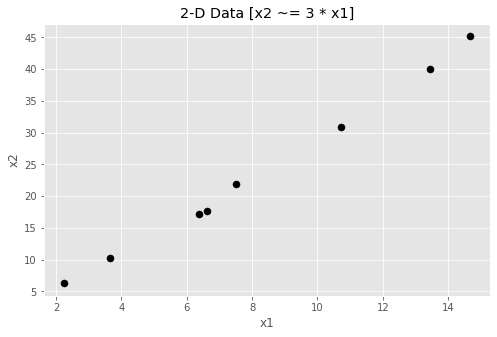

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

fig.show()


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_std=False)

x = scaler.fit_transform(df[['x1', 'x2']])
# x = df[['x1', 'x2']]

pca = PCA(n_components=1)

pca.fit_transform(x)

array([[  7.63717849],
       [-14.14664397],
       [ 22.44990447],
       [-18.38054565],
       [ -6.66477348],
       [ -6.13768884],
       [ -1.86497825],
       [ 17.10754722]])

In [6]:
pca.explained_variance_

array([211.21906366])

In [7]:
pca.components_

array([[0.30489032, 0.95238747]])

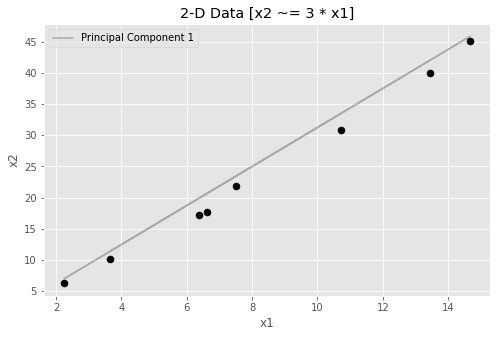

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

c1_slope = pca.components_[0][1] / pca.components_[0][0]
c1 = np.array([
    [x1, x1 * c1_slope]
    for x1 in df['x1'].values
])
ax.plot(c1[:,0], c1[:,1], '-k', alpha=0.25, label='Principal Component 1')

ax.legend()

fig.show()